In [ ]:
import numpy as np
import math

In [ ]:
squence_len=11
d_k=6
d_v=6

In [ ]:
q=np.random.randn(squence_len,d_k)
q.shape

(11, 6)

In [ ]:
k=np.random.randn(squence_len,d_k)
v=np.random.randn(squence_len,d_v)

In [ ]:
similarity_vector=q.dot(k.T)

why scaling?

In [ ]:
q.var(),k.var(),v.var(),similarity_vector.var()

(np.float64(0.99167820547766),
 np.float64(1.2701507652876793),
 np.float64(0.8336110904623867),
 np.float64(9.17342255203448))

as you can see the varience of dot product is huge, we need to minimize it, to overcome gradient vanishing

In [ ]:
similarity_vector.shape

(11, 11)

In [ ]:
scaled_dot_product=similarity_vector/math.sqrt(d_k)

In [ ]:
q.var(),k.var(),v.var(),scaled_dot_product.var()

(np.float64(0.99167820547766),
 np.float64(1.2701507652876793),
 np.float64(0.8336110904623867),
 np.float64(1.528903758672414))

see, now the varience of dot prioduct is almost equalent to q,k and v

In [ ]:
import scipy.special
alignment_score = scipy.special.softmax(scaled_dot_product)

In [ ]:
alignment_score

array([[4.94672558e-04, 1.32596677e-03, 7.62722860e-03, 4.12201718e-03,
        4.25685363e-03, 1.94220106e-02, 3.70569816e-03, 7.97284501e-04,
        7.73467563e-03, 8.21249999e-03, 4.69009525e-03],
       [2.29290827e-03, 9.31914132e-04, 1.94696893e-03, 1.31005996e-03,
        2.82427425e-03, 1.17311370e-03, 3.37324248e-03, 3.14317529e-03,
        1.09441398e-03, 3.02056702e-03, 5.27661481e-03],
       [9.09477174e-04, 2.34343113e-03, 8.02215521e-03, 3.42364855e-03,
        2.79982312e-03, 3.32223671e-03, 2.71789766e-03, 1.12190473e-02,
        6.10692844e-03, 1.75015872e-03, 3.26721182e-03],
       [5.24156229e-03, 1.96695994e-02, 1.29343277e-03, 2.37498086e-03,
        1.16176899e-03, 1.69921864e-03, 2.18679121e-03, 4.73515562e-03,
        2.05945543e-03, 3.49024881e-03, 1.00927241e-03],
       [2.10794786e-03, 1.48805009e-03, 1.04343192e-03, 9.43753786e-03,
        5.82308071e-03, 6.95002333e-03, 1.80785335e-03, 2.03567064e-04,
        1.32270579e-03, 2.56071815e-03, 1.41146880e-

In [ ]:
attention=alignment_score.dot(v)

In [ ]:
attention.shape

(11, 6)

In [ ]:
attention

array([[-4.75814109e-02, -1.24296049e-02,  2.99811507e-02,
        -4.34255050e-03,  1.95299447e-02, -4.51187373e-02],
       [-1.24665438e-02,  3.39070244e-03,  7.23584783e-03,
        -1.27227410e-02,  3.35239406e-03, -5.29465260e-03],
       [-3.21326995e-02, -6.46937182e-03,  2.47107794e-02,
        -3.68629045e-02, -8.78481876e-03, -6.99928643e-03],
       [-5.64636528e-02,  2.78167691e-02, -6.29332862e-03,
        -2.91327273e-02,  3.36723059e-03,  2.30417889e-02],
       [-2.47791232e-02, -3.70058665e-03,  1.30507985e-02,
         7.03505015e-03,  1.08472149e-02, -1.56127905e-02],
       [-4.43615183e-02, -1.90341631e-02, -1.77188106e-02,
        -5.12042040e-03,  6.54906208e-02, -4.13368379e-02],
       [-6.39858612e-01, -1.40336173e-01,  4.03951460e-01,
         2.74719730e-01,  2.11364364e-01, -7.41672943e-01],
       [-2.06874227e-02, -5.32745413e-04,  1.44820208e-02,
        -1.98221235e-02, -2.04759768e-03, -6.63194066e-03],
       [-1.71108645e-02,  1.25297454e-02, -4.853

self_attention with masking


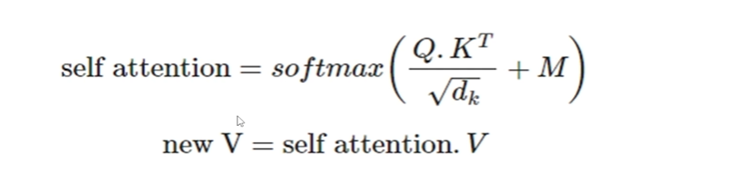

In [ ]:
mask=np.tril(np.ones((squence_len,squence_len)))

tril will make zeros along main digonal

In [ ]:
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
mask.shape

(11, 11)

In [ ]:
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
mask[mask==0]=-np.inf
mask[mask==1]=0

In [ ]:
mask

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
masked_attention_score=scipy.special.softmax(scaled_dot_product+mask)

In [ ]:
masked_attention_score.shape

(11, 11)

In [ ]:
masked_attention_score

array([[7.05139539e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.26846568e-03, 1.32841309e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.29642994e-03, 3.34048437e-03, 1.14353197e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.47167546e-03, 2.80383700e-02, 1.84374607e-03, 3.38545747e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00481068e-03, 2.12116670e-03, 1.48737805e-03, 1.34529013e-02,
        8.30061094e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [ ]:
masked_attention_score.shape

(11, 11)

In [ ]:
masked_attention=masked_attention_score.dot(v)

In [ ]:
masked_attention.shape

(11, 6)

In [ ]:
masked_attention

array([[-2.34535028e-04,  1.48419854e-03, -2.17574011e-04,
        -1.88813328e-04, -6.75239301e-04,  2.26213953e-04],
       [-3.89913346e-03,  8.53314887e-03, -1.83572733e-03,
        -2.04920743e-03, -2.77053447e-03,  2.80150758e-03],
       [-7.65804382e-03,  4.86739999e-03,  1.18423020e-02,
        -1.46602427e-02, -2.40873853e-03,  9.27089985e-05],
       [-6.33354918e-02,  4.69924841e-02, -1.55605139e-02,
        -2.42965521e-02,  1.50314316e-03,  4.09417327e-02],
       [-1.78053246e-02, -8.61604369e-04,  9.64475376e-03,
         5.53068374e-03,  3.46939093e-03, -9.48860749e-04],
       [-3.30176408e-02,  1.30538662e-02,  1.46939196e-02,
         4.70498237e-03,  8.35189417e-03, -3.78152756e-02],
       [-7.99003017e-01, -1.19547232e-01,  5.06585243e-01,
         4.95687570e-01,  4.60608868e-01, -1.15097817e+00],
       [-2.04514643e-02,  4.78496118e-03,  2.04564351e-02,
        -1.82075392e-02, -2.87548537e-03, -1.18080254e-02],
       [-1.94184005e-02,  2.16153364e-02,  8.932